In [1]:
!pip install bangla_stemmer
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.0 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=1c76048b7e1decbc4e82c04d7ea5d97a1d44f5df22897152854aad994646357f
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.10.0
    Uninstalling emoji-2.10.0:
      Successfully uninstalled emoji-2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bnlp import NLTKTokenizer
from bs4 import BeautifulSoup
from bnlp import BengaliCorpus as corpus
import re
from bangla_stemmer.stemmer import stemmer

In [3]:
df_train = pd.read_excel("/kaggle/input/bemoc-data/BEmoC7k.xlsx")

In [4]:
df_train.head()

,TEXT,classes
0,নাইমা কি করবেন আমরা জানি,sadness
1,ভাই সব আপনাদের খুব ভাল লাগছে,joy
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ...,anger
3,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,joy
4,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,disgust


In [5]:
df_train.dropna(inplace=True)

In [6]:
longest_string = max(df_train["TEXT"], key=len)
print(len(longest_string))

1093


In [7]:
df_train['classes'].value_counts()

classes
joy         1524
disgust     1356
sadness     1327
anger       1052
fear         962
surprise     779
Name: count, dtype: int64

In [8]:
def rem_symbol_punct(text):
    pattern = re.compile('[!@#$%^&*()_+-={}\[\];:\'\"\|<>,.///?`~।]', flags=re.I)
    return pattern.sub(r'', text)


def remove_html_and_urls(text):
    # Remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text_without_html = soup.get_text()

    # Remove URLs
    text_without_urls = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text_without_html)

    return text_without_urls


def remove_emojis(text):
    # Emoji patterns for different Unicode ranges
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        "\U0001F700-\U0001F77F"  # Alphanumeric Supplement
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbat symbols
        "\U000024C2-\U0001F251" 
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r'', text)


#remove noise
def Remove_text(text):
    text = rem_symbol_punct(text)
    text = remove_html_and_urls(text)
    text = remove_emojis(text)
    return text

In [9]:
df_train['TEXT'] = df_train['TEXT'].apply(Remove_text)

In [10]:
longest_string = max(df_train["TEXT"], key=len)
print(len(longest_string))

1093


In [11]:
# Instantiate the NLTKTokenizer
bnltk = NLTKTokenizer()


def remove_stopwords(text):
    # Get the list of Bengali stopwords
    bengali_stopwords = corpus.stopwords
    
    # Tokenize the Bengali text using NLTKTokenizer
    word_tokens = bnltk.word_tokenize(text)
    
    # Remove stopwords
    filtered_tokens = [token for token in word_tokens if token not in bengali_stopwords]
    
    # Join the filtered tokens back into a text
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text


In [12]:
df_train['TEXT'] = df_train['TEXT'].apply(remove_stopwords)

In [13]:
longest_string = max(df_train["TEXT"], key=len)
print(len(longest_string))

712


In [14]:
def apply_bangla_stemming(text):
    stmr = stemmer.BanglaStemmer()
    word_tokens = bnltk.word_tokenize(text)
    stemmed_words = [stmr.stem(word) for word in word_tokens]
    return ' '.join(stemmed_words)


In [15]:
# Example usage:
df_train['TEXT'] = df_train['TEXT'].apply(apply_bangla_stemming)


applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied third rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
ap

In [16]:
df_train['TEXT']

0                                              নাইমা জানি
1                                        ভাই আপনা ভাল লাগ
2           গাঞ্জা খাইয়া নিউজ শেয় দিগন্ত বয়কটে জরিমানা
3                              ধন্যবাদ স্য যশোরে অনুষ্ঠান
4                          বর্তমানে মুসলমান মারে হয় ঈশ্বর
                              ...                        
6995    হে আল্লাহ দেশের সহায়ক মহামারী নিকট আশ্রয় চাই...
6996    ঈদ ছারা যুদি বাংলাদেশ ঈদের খুশির অামেজ পান নিব...
6997    বছর সবচ সের ভিডি দেখেছি দেশের সাথে ভূটান ভাল স...
6998                কিরে মিথ্যা কথা কস গতদিন আসিফ আস খালি
6999    ভাইরেভাই বেস্ট এই বেস্ট এইরকম পারফেক্ট গল্প মু...
Name: TEXT, Length: 7000, dtype: object

In [17]:
longest_string = max(df_train["TEXT"], key=len)
print(len(longest_string))

646


In [18]:
df_train['TEXT'] 

0                                              নাইমা জানি
1                                        ভাই আপনা ভাল লাগ
2           গাঞ্জা খাইয়া নিউজ শেয় দিগন্ত বয়কটে জরিমানা
3                              ধন্যবাদ স্য যশোরে অনুষ্ঠান
4                          বর্তমানে মুসলমান মারে হয় ঈশ্বর
                              ...                        
6995    হে আল্লাহ দেশের সহায়ক মহামারী নিকট আশ্রয় চাই...
6996    ঈদ ছারা যুদি বাংলাদেশ ঈদের খুশির অামেজ পান নিব...
6997    বছর সবচ সের ভিডি দেখেছি দেশের সাথে ভূটান ভাল স...
6998                কিরে মিথ্যা কথা কস গতদিন আসিফ আস খালি
6999    ভাইরেভাই বেস্ট এই বেস্ট এইরকম পারফেক্ট গল্প মু...
Name: TEXT, Length: 7000, dtype: object

In [19]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_train, test_size=0.2,stratify=df_train['classes'],random_state=42)

In [20]:
X_train  =  train_df['TEXT'].values.tolist()
y_train = train_df['classes'].tolist()

In [21]:
X_test =  test_df['TEXT'].values.tolist()
y_test = test_df['classes'].tolist()

In [22]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 56.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 44.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 26.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 12.2 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=209add9fe8d9c7b4993deca75e9d27b4a03e76e953f77d47921f3986607ca082
  Stored in directory: /roo

In [23]:
import ktrain
from ktrain import text
MODEL_NAME = 'csebuetnlp/banglabert'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [24]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 14
	95percentile : 29
	99percentile : 40


tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 15
	95percentile : 29
	99percentile : 44


In [25]:
print(trn)

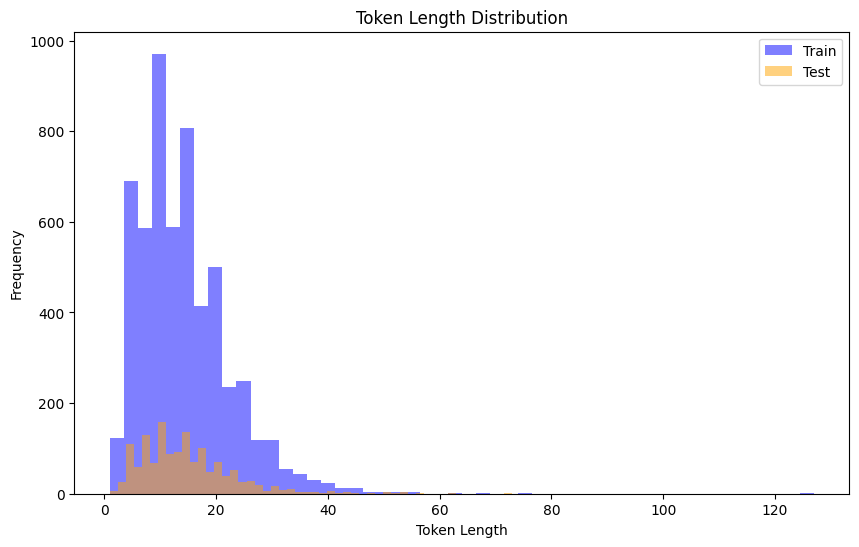

In [26]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [27]:
model = t.get_classifier()

In [28]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [29]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [30]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
700/700 [==============================] - 426s 574ms/step - loss: 1.6628 - accuracy: 0.3264 - val_loss: 1.3707 - val_accuracy: 0.5000
Epoch 2/10
700/700 [==============================] - 398s 568ms/step - loss: 1.2232 - accuracy: 0.5432 - val_loss: 1.0704 - val_accuracy: 0.6071
Epoch 3/10
700/700 [==============================] - 398s 568ms/step - loss: 0.9222 - accuracy: 0.6646 - val_loss: 0.9721 - val_accuracy: 0.6429
Epoch 4/10
700/700 [==============================] - 397s 568ms/step - loss: 0.7307 - accuracy: 0.7282 - val_loss: 1.0338 - val_accuracy: 0.6493
Epoch 5/10
700/700 [==============================] - 397s 568ms/step - loss: 0.5669 - accuracy: 0.7979 - val_loss: 1.1896 - val_accuracy: 0.6393
Epoch 6/10
700/700 [==============================] - 398s 568ms/step - loss: 0.4365 - accuracy: 0.8512 - val_loss: 1.3025 - val_accuracy: 0.6229
Epoch 7/10
700/700 [==============================] - 398s 56

In [31]:
# Save the trained model
learner.save_model('/kaggle/output/model.zip')

In [32]:
classes=t.get_classes()

In [33]:
cm = learner.validate(class_names=t.get_classes())

44/44 [==============================] - 9s 132ms/step
              precision    recall  f1-score   support

       anger       0.53      0.52      0.53       211
     disgust       0.53      0.58      0.55       271
        fear       0.65      0.70      0.67       192
         joy       0.81      0.76      0.79       305
     sadness       0.63      0.68      0.65       265
    surprise       0.66      0.51      0.58       156

    accuracy                           0.64      1400
   macro avg       0.64      0.63      0.63      1400
weighted avg       0.64      0.64      0.64      1400



In [34]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [35]:
!zip -r mental.zip /kaggle/output/model

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/model

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/model)


In [36]:
!ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


__notebook__.ipynb


In [37]:
# from IPython.display import FileLink
# FileLink(r'/kaggle/working/mental-health-rand.zip')

In [38]:
# df_cm = pd.DataFrame(cm, index=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "],
#                      columns=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "])
# plt.figure(figsize = (10,7))
# sns.heatmap(df_cm,annot=True, fmt ="d")